In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filepath = "popularity.tsv"

In [2]:
# Load the csv file
df = pd.read_csv(filepath, sep='\t')
# Extract the year and month from the 'file' column
df[['year', 'month']] = df['file'].str.extract(r'(\d{4})-(\d{2})\.tsv\.gz')

# Convert 'year' and 'month' columns to integers
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

#Filter out urls
df = df[df['url'] != 'Main_Page']
df = df[df['url'] != 'Hyphen-minus']
df = df[df['url'] != 'Deaths_in_2018']
df = df[df['url'] != 'IPv4']


# Group by year-month and sum the clicks
#mc = df.groupby(['year', 'month']).sum
# overview of df
df.describe


<bound method NDFrame.describe of                                                     file  \
0      hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
1      hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
2      hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
3      hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
4      hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
...                                                  ...   
19702  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
19703  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
19704  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
19705  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
19706  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   

                        url  toClicksLink  toClicksExternal  toClicksOther  \
0      2020_Summer_Olympics         56145            142283            757   
1       2022_FIFA_World_Cup         36110             60615            396   
2          

In [3]:
# Calculate total frequency for each URL
url_total_frequency = df.groupby(['url', 'year', 'month']).sum()['toClicks'].reset_index()

# Rank the URLs based on total frequency for each month and year
url_ranking = url_total_frequency.sort_values(['year', 'month', 'toClicks'], ascending=[True, True, False]) \
                                   .groupby(['year', 'month'])['url'].apply(lambda x: x.reset_index(drop=True)).reset_index()

# Add a column for the rank within each group of year and month
url_ranking['rank_within_group'] = url_ranking.groupby(['year', 'month']).cumcount() + 1

# Add a column for the score (100 for the top, decreasing by 1)
url_ranking['score'] = 100 - url_ranking['rank_within_group'] + 1

# Display the result
url_ranking.head()

,year,month,level_2,url,rank_within_group,score
0,2018,1,0,XHamster,1,100
1,2018,1,1,JSON_Web_Token,2,99
2,2018,1,2,HTTP_cookie,3,98
3,2018,1,3,Access_token,4,97
4,2018,1,4,Session_ID,5,96


/var/folders/43/n_g0_6414ls4lgzr4t68l6rr0000gn/T/ipykernel_26633/3030421049.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='score', data=url_scores_top50, palette='viridis')


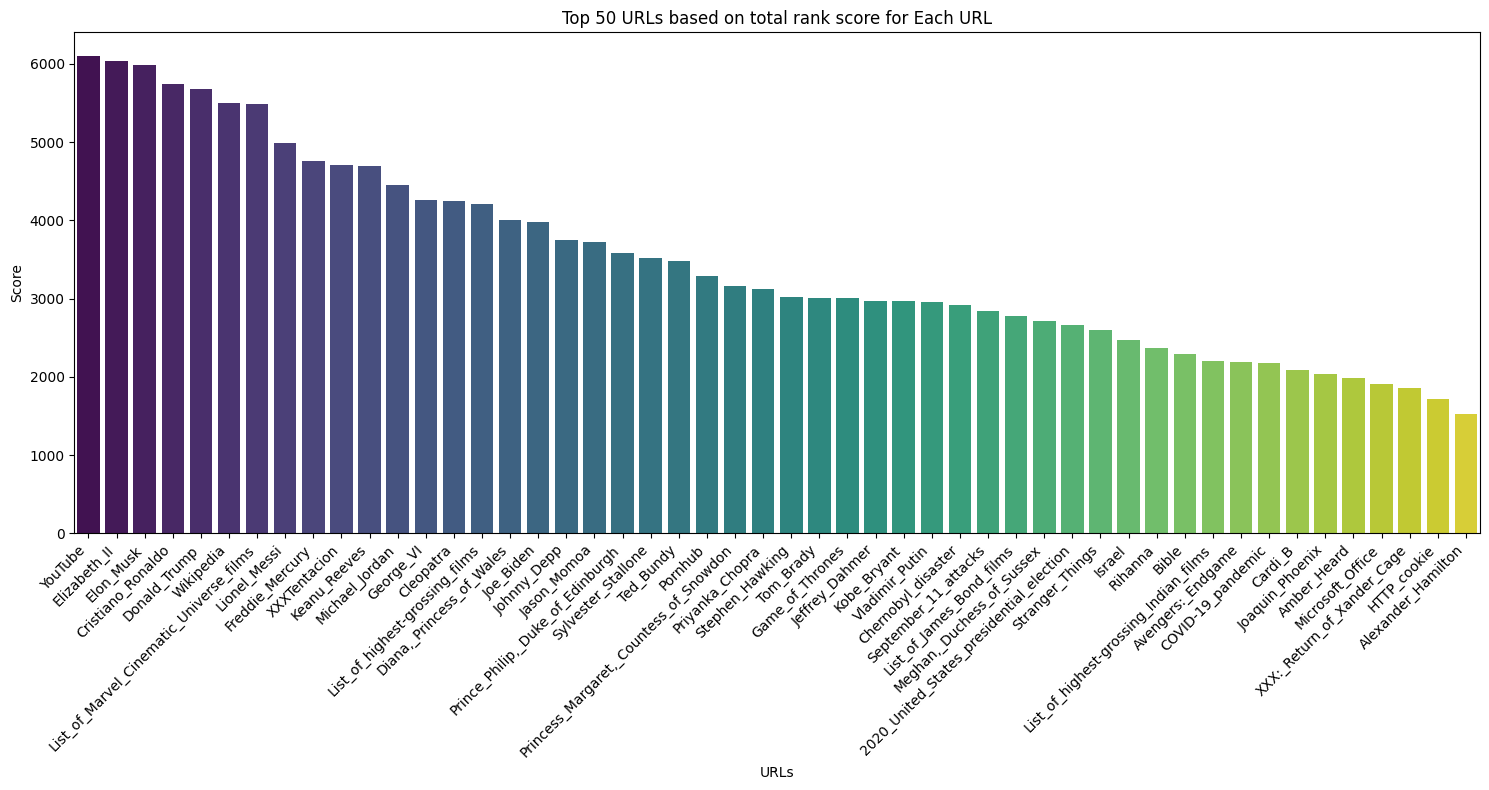

In [4]:
# Group by URL and calculate the sum of scores for each URL
url_scores = url_ranking.groupby('url')['score'].sum().reset_index()

# Sort the DataFrame based on the 'score' column
url_scores_sorted = url_scores.sort_values('score', ascending=False)

# Limit to the top 50 scores
url_scores_top50 = url_scores_sorted.head(50)

# Create a bar plot with URLs on the x-axis and scores on the y-axis
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='score', data=url_scores_top50, palette='viridis')
plt.title('Top 50 URLs based on total rank score for Each URL')
plt.xlabel('URLs')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save the plot as an SVG file with high quality
plt.savefig('top50RankScore.svg')
plt.show()


/var/folders/43/n_g0_6414ls4lgzr4t68l6rr0000gn/T/ipykernel_26633/3609169327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='score', data=url_scores_top100, palette='viridis')


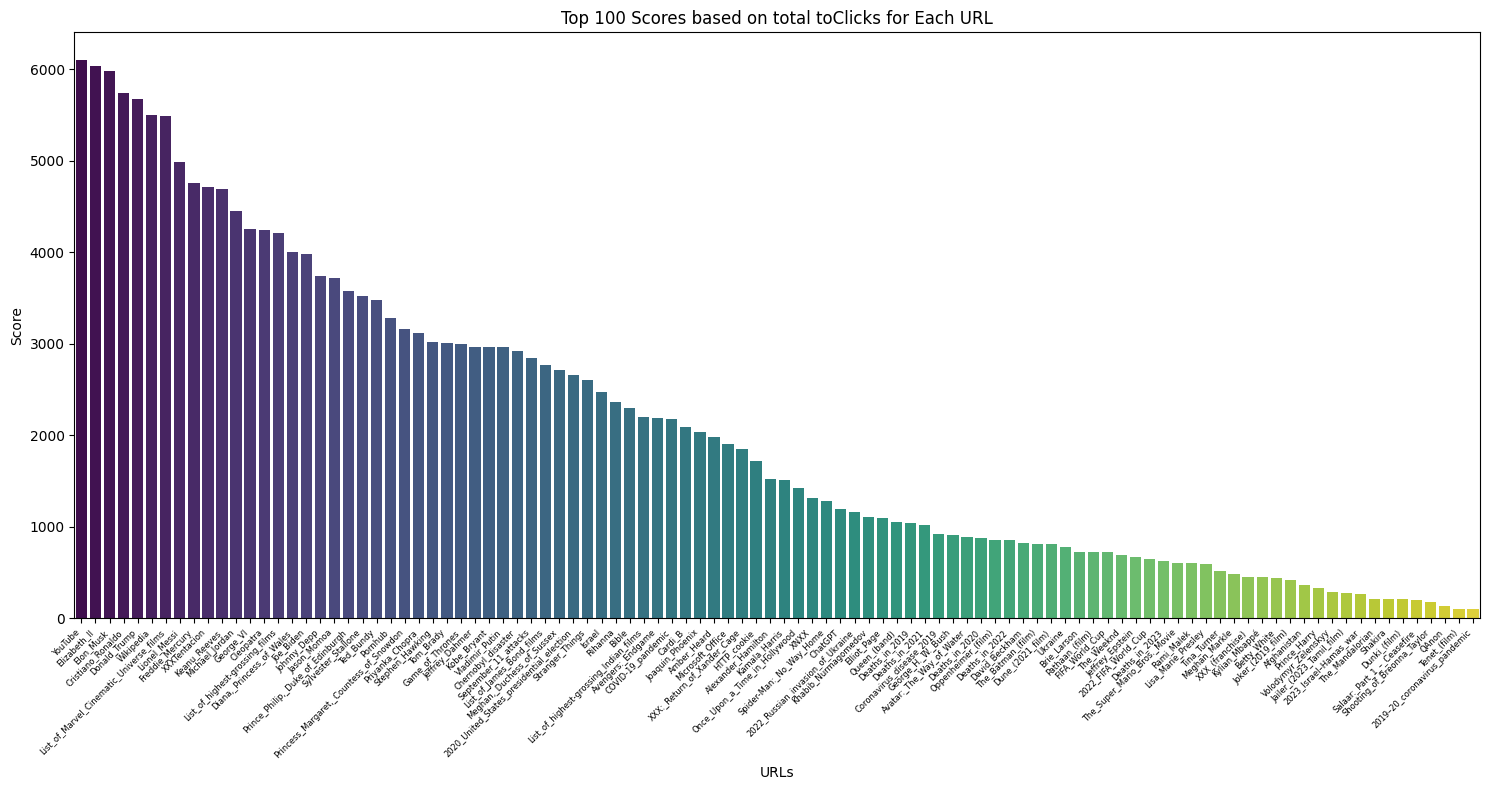

In [5]:
# Limit to the top 100 scores
url_scores_top100 = url_scores_sorted.head(100)

# Create a bar plot with URLs on the x-axis and scores on the y-axis
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='score', data=url_scores_top100, palette='viridis')
plt.title('Top 100 Scores based on total toClicks for Each URL')
plt.xlabel('URLs')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()

/var/folders/43/n_g0_6414ls4lgzr4t68l6rr0000gn/T/ipykernel_26633/2855745733.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='score', data=url_variance_top100_sorted, palette='viridis')


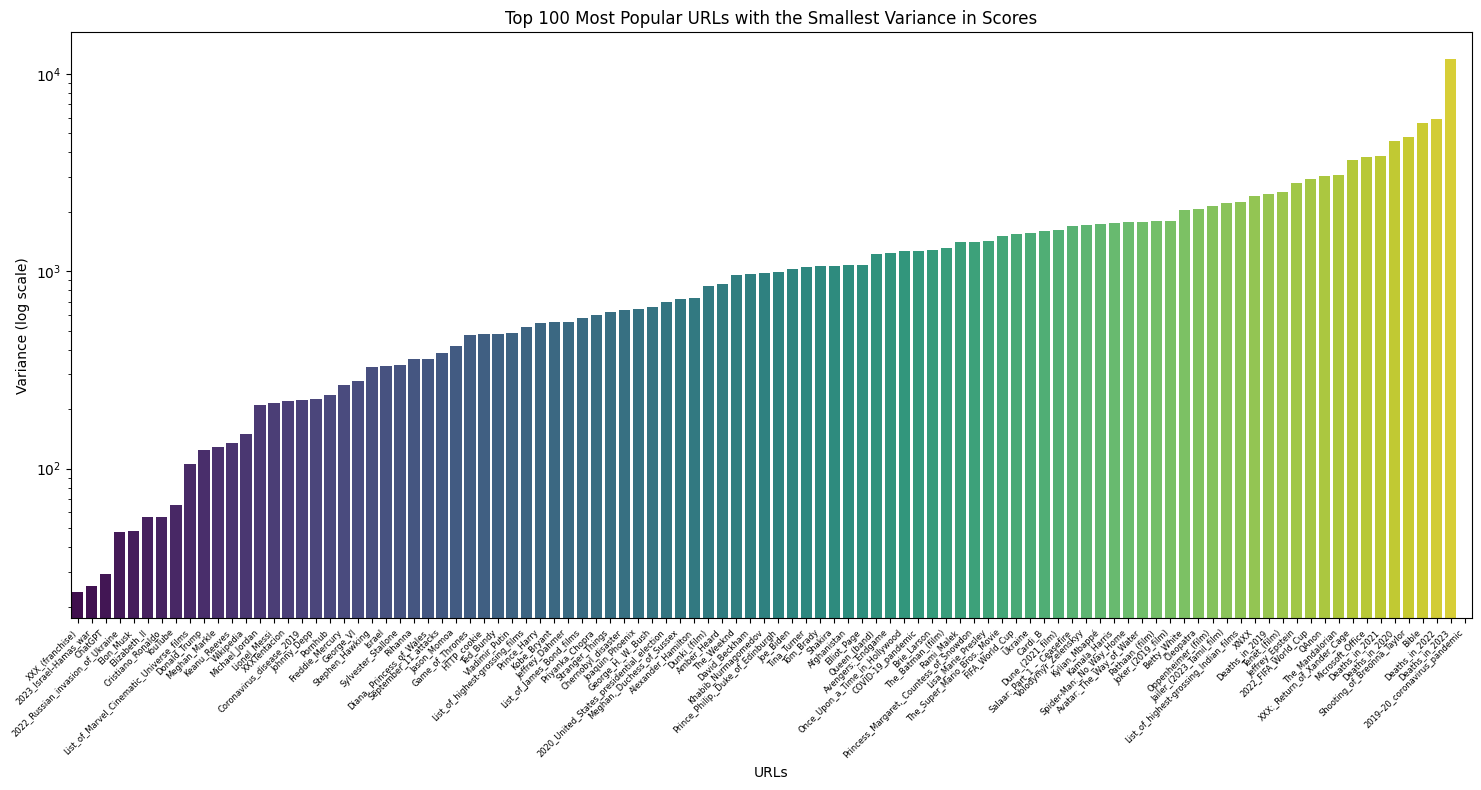

In [6]:

# Calculate total frequency for each URL
url_total_frequency = df.groupby(['url', 'year', 'month']).sum()['toClicks'].reset_index()

# Rank the URLs based on total frequency for each month and year
url_ranking = url_total_frequency.sort_values(['year', 'month', 'toClicks'], ascending=[True, True, False]) \
                                   .groupby(['year', 'month'])['url'].apply(lambda x: x.reset_index(drop=True)).reset_index()

# Add a column for the rank within each group of year and month
url_ranking['rank_within_group'] = url_ranking.groupby(['year', 'month']).cumcount() + 1

# Add a column for the score (100 for the top, decreasing by 1)
url_ranking['score'] = 100 - url_ranking['rank_within_group'] + 1

# Group by URL and calculate the sum of scores for each URL
url_scores = url_ranking.groupby('url')['score'].sum().reset_index()

# Sort the DataFrame based on the total scores in descending order
url_scores_sorted = url_scores.sort_values('score', ascending=False)

# Limit to the top 100 most popular URLs
url_scores_top100 = url_scores_sorted.head(100)
# Calculate the variance for the top 100 most popular URLs
url_variance_top100 = url_ranking[url_ranking['url'].isin(url_scores_top100['url'])].groupby('url')['score'].var().reset_index()

# Sort the DataFrame based on the variance in ascending order
url_variance_top100_sorted = url_variance_top100.sort_values('score', ascending=True)

# Create a bar plot with URLs on the x-axis and variance on the y-axis
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='score', data=url_variance_top100_sorted, palette='viridis')
plt.title('Top 100 Most Popular URLs with the Smallest Variance in Scores')
plt.yscale('log')
plt.xlabel('URLs')
plt.ylabel('Variance (log scale)')
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()

/var/folders/43/n_g0_6414ls4lgzr4t68l6rr0000gn/T/ipykernel_26633/2286558455.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='score', data=url_variance_top50_sorted, palette='viridis')


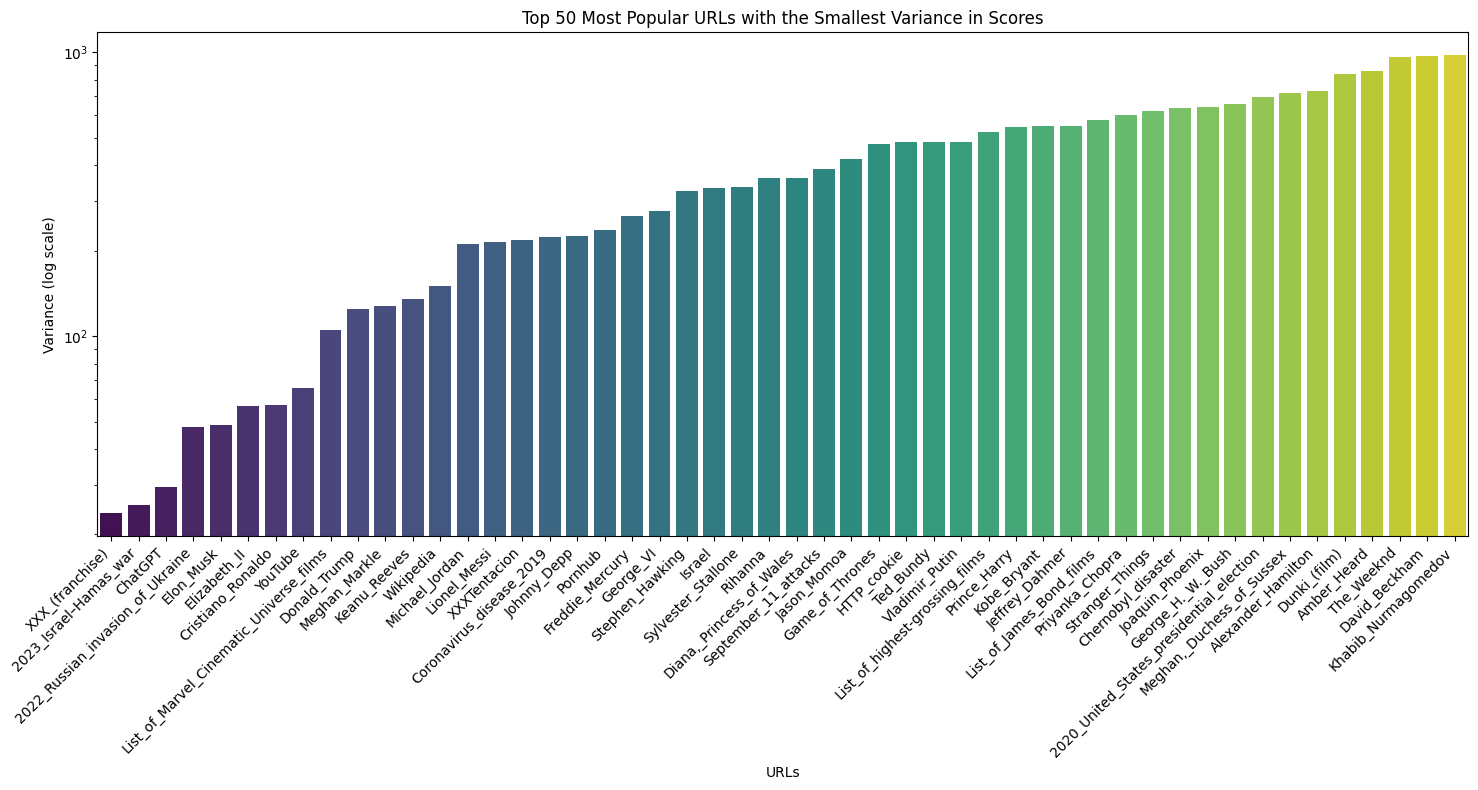

In [7]:

# Limit to the top 50 most popular URLs
url_scores_top50 = url_scores_sorted.head(100)
# Calculate the variance for the top 50 most popular URLs
url_variance_top50 = url_ranking[url_ranking['url'].isin(url_scores_top50['url'])].groupby('url')['score'].var().reset_index()

# Sort the DataFrame based on the variance in ascending order
url_variance_top50_sorted = url_variance_top50.sort_values('score', ascending=True).head(50)

# Create a bar plot with URLs on the x-axis and variance on the y-axis
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='score', data=url_variance_top50_sorted, palette='viridis')
plt.title('Top 50 Most Popular URLs with the Smallest Variance in Scores')
plt.xlabel('URLs')
plt.ylabel('Variance (log scale)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/43/n_g0_6414ls4lgzr4t68l6rr0000gn/T/ipykernel_26633/2871065308.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='toClicks', data=top_50_urls, palette='viridis')


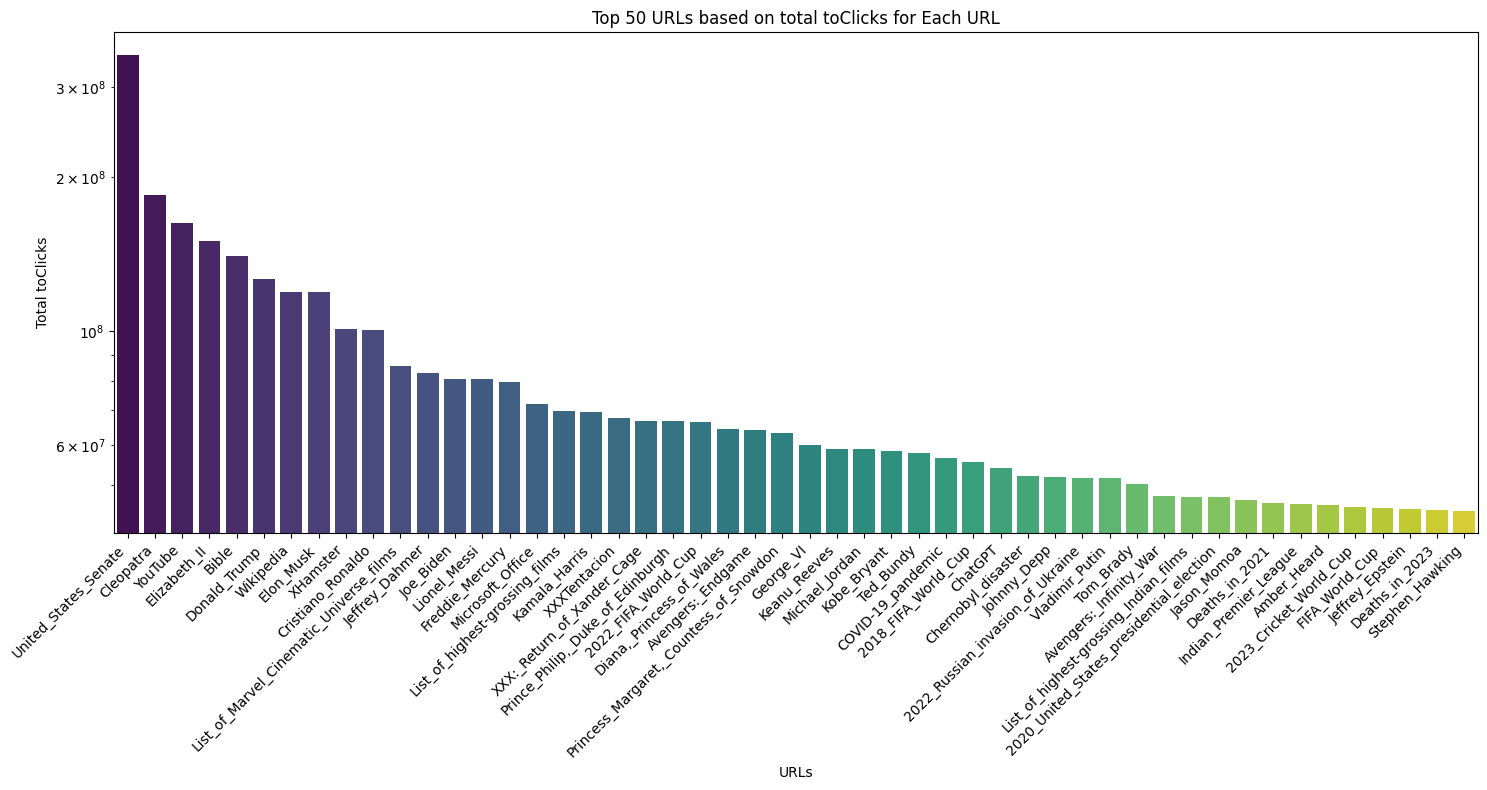

In [8]:
# Calculate total toClicks per URL
total_toClicks_per_url = df.groupby('url')['toClicks'].sum().reset_index()

# Sort URLs based on total toClicks in descending order
sorted_urls = total_toClicks_per_url.sort_values('toClicks', ascending=False)

# Select the top 50 URLs
top_50_urls = sorted_urls.head(50)

# Create a bar plot with URLs on the x-axis and total toClicks on the y-axis for the top 50 URLs
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='toClicks', data=top_50_urls, palette='viridis')
plt.title('Top 50 URLs based on total toClicks for Each URL')
plt.xlabel('URLs')
plt.ylabel('Total toClicks')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as an SVG file with high quality
plt.savefig('top50ClickScore.svg')
plt.show()

In [9]:
# Create a DataFrame with all combinations of months, years, and URLs
all_combinations = []
for year in range(df['year'].min(), df['year'].max() + 1):
    for month in range(1, 13):
        for url in df['url'].unique():
            all_combinations.append({'year': year, 'month': month, 'url': url})

# Convert the list of dictionaries to a DataFrame
all_combinations_df = pd.DataFrame(all_combinations)

# Merge the all_combinations_df with the original DataFrame df
merged_df = pd.merge(all_combinations_df, df, on=['year', 'month', 'url'], how='left')

# Fill missing values with 0 for the 'toClicks' column
merged_df['toClicks'].fillna(0, inplace=True)

# Calculate variance for each URL based on 'toClicks' over the months
url_variance = merged_df.groupby('url')['toClicks'].var().reset_index()

# Calculate the number of zero entries for each URL based on 'toClicks' over the months
url_zero_count = merged_df.groupby('url')['toClicks'].apply(lambda x: (x == 0).sum()).reset_index()
url_zero_count.columns = ['url', 'zero_count']

# Merge zero count values with the variance DataFrame
url_stats = pd.merge(url_variance, url_zero_count, on='url')

print(url_stats)
# Filter out URLs with more than N zero entries
N = 0
url_stats_filtered = url_stats[url_stats['zero_count'] <= N]

# Sort URLs based on variance in ascending order
url_stats_sorted = url_stats_filtered.sort_values('toClicks', ascending=True)

                                          url      toClicks  zero_count
0                                        1234  3.034131e+11           0
1                            1917_(2019_film)  2.460132e+11          15
2                                  2.0_(film)  3.478944e+11           0
3    2016_United_States_presidential_election  1.879879e+12          10
4                            2018_Asian_Games  1.355468e+11           0
..                                        ...           ...         ...
334                XXX:_Return_of_Xander_Cage  1.708903e+12          11
335                              XXXTentacion  1.036999e+12           0
336                           XXX_(franchise)  3.901990e+11          67
337                                   YouTube  3.056547e+12           0
338              Zack_Snyder's_Justice_League  5.610088e+11          28

[339 rows x 3 columns]


/var/folders/43/n_g0_6414ls4lgzr4t68l6rr0000gn/T/ipykernel_26633/2651972204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='toClicks', data=url_stats_sorted.head(50), palette='viridis')


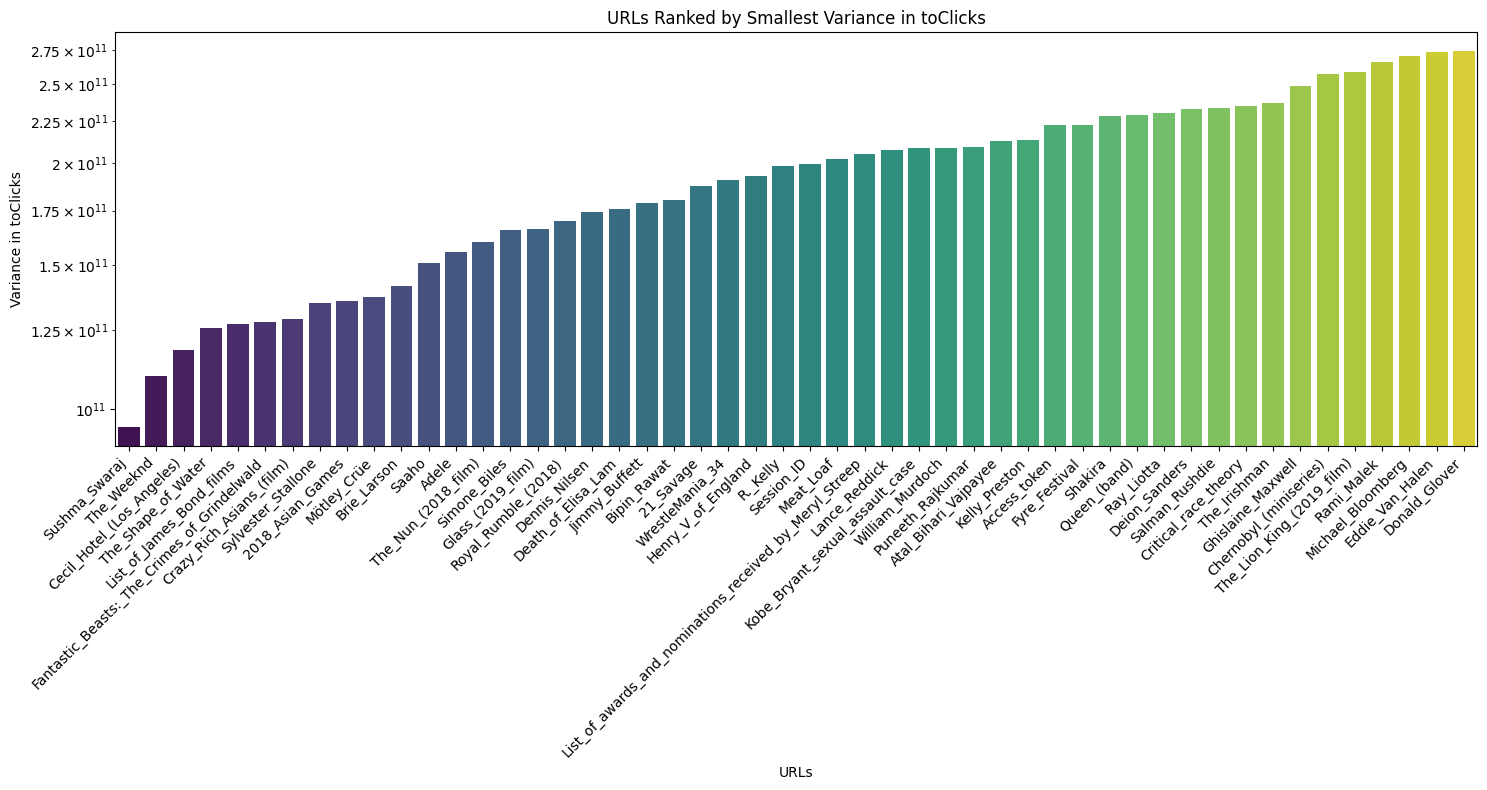

In [11]:
# Create a bar plot with URLs on the x-axis and variance on the y-axis
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='toClicks', data=url_stats_sorted.head(50), palette='viridis')
plt.title('URLs Ranked by Smallest Variance in toClicks')
plt.xlabel('URLs')
plt.ylabel('Variance in toClicks')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Save the plot as an SVG file with high quality
plt.savefig('top50LowestVar.svg')
plt.show()


In [12]:
# Get unique URLs from the DataFrame
unique_urls = merged_df['url'].unique()

# Iterate over each unique URL
for url in unique_urls:
    # Filter the DataFrame for the specific URL
    url_data = merged_df[merged_df['url'] == url]
    
    # Check if the length of url_data is not equal to 72
    if len(url_data) != 72:
        print(f"The URL '{url}' does not contain 72 rows for entry.")
        


In [13]:
# Specify the URL for which you want to print toClicks values
target_url = "Sushma_Swaraj"

# Filter the DataFrame for the specific URL
target_url_data = merged_df[merged_df['url'] == target_url]

# Print the toClicks values for the specific URL
for index, row in target_url_data.iterrows():
    print(f"Month: {row['month']}, Year: {row['year']}, toClicks: {row['toClicks']}")


Month: 1, Year: 2018, toClicks: 38531.0
Month: 2, Year: 2018, toClicks: 30219.0
Month: 3, Year: 2018, toClicks: 39730.0
Month: 4, Year: 2018, toClicks: 30424.0
Month: 5, Year: 2018, toClicks: 32663.0
Month: 6, Year: 2018, toClicks: 39026.0
Month: 7, Year: 2018, toClicks: 39923.0
Month: 8, Year: 2018, toClicks: 47482.0
Month: 9, Year: 2018, toClicks: 39615.0
Month: 10, Year: 2018, toClicks: 31000.0
Month: 11, Year: 2018, toClicks: 77973.0
Month: 12, Year: 2018, toClicks: 34732.0
Month: 1, Year: 2019, toClicks: 35727.0
Month: 2, Year: 2019, toClicks: 51829.0
Month: 3, Year: 2019, toClicks: 76658.0
Month: 4, Year: 2019, toClicks: 43837.0
Month: 5, Year: 2019, toClicks: 147029.0
Month: 6, Year: 2019, toClicks: 91956.0
Month: 7, Year: 2019, toClicks: 41914.0
Month: 8, Year: 2019, toClicks: 2649135.0
Month: 9, Year: 2019, toClicks: 74620.0
Month: 10, Year: 2019, toClicks: 55215.0
Month: 11, Year: 2019, toClicks: 40444.0
Month: 12, Year: 2019, toClicks: 33545.0
Month: 1, Year: 2020, toClicks: